Para esta entrega se trata de realizar varias regresiones k-NN, ya sea con la
función incluida en el notebook knn.00, con una modificación de ella o con otra
función (la función proporcionada en el notebook es sólo una posibilidad, tiene
mucho margen de mejora). En cada regresión debéis hacer una validación
cruzada, calculando el error cuadrático de predicción con un subconjunto de
prueba seleccionado al azar del total de datos. Basándoos en ella decidid qué
valor o valores de k permiten una mejor predicción.

1. Leed los datos 'Advertising', eliminando la primera columna, que contiene el índice de cada observación.

Advertising<-read.csv("Advertising.csv")

Advertising<-Advertising[,-1]

In [61]:
Advertising<-read.csv("Advertising.csv")
Advertising<-Advertising[,-1]

indexTrain <- nrow(Advertising)*0.75

Preparad tres regresiones univariantes k-NN de la respuesta 'Sales' frente a
cada uno de los tres predictores: 'TV', 'Radio', 'Newspaper' y una
regresión múltiple de la respuesta 'Sales' frente al conjunto de los tres
predictores. Será relevante, en este último caso, estandarizar los predictores

In [62]:
tvTrain <- Advertising[0:indexTrain,1]
radioTrain <- Advertising[0:indexTrain,2]
newpaperTrain <- Advertising[0:indexTrain,3]
salesTrain <- Advertising[0:indexTrain,4]


tvTest <- Advertising[(indexTrain+1):nrow(Advertising),1]
radioTest <- Advertising[(indexTrain+1):nrow(Advertising),2]
newpaperTest <- Advertising[(indexTrain+1):nrow(Advertising),3]
salesTest <- Advertising[(indexTrain+1):nrow(Advertising),4]

In [63]:
advTrain <- Advertising[0:indexTrain,1:3]
advTest <- Advertising[(indexTrain+1):nrow(Advertising),1:3]
dim(advTrain)
dim(advTest)

[1] 150   3

[1] 50  3

In [64]:
knn.regression<-function(Xtrain,ytrain,k,x0){
    n<-nrow(Xtrain)
    p<-ncol(Xtrain)
    X0<-sweep(Xtrain,2,x0)
    X02<-X0^2
    dx0<-apply(X02,1,sum)
    Idx<-sort(dx0,index.return=TRUE)$ix
    ys<-ytrain[Idx[1:k]]
    return(mean(ys))
}

knn.class<-function(Xtrain,ytrain,k,x0,CRISP=TRUE){
    ys<-knn.prep(Xtrain,ytrain,k,x0)
    T<-table(ys)
    freq<-as.numeric(T)
    vals<-names(T)
    if (CRISP)
        y.hat<-vals[which.max(freq)]
    else
        y.hat<-Softmax(freq)
    return(y.hat)
}
        
knn.prep<-function(Xtrain,ytrain,k,x0){
    
    n<-nrow(Xtrain)
    p<-ncol(Xtrain)
    X0<-sweep(Xtrain,2,x0)
    X02<-X0^2
    dx0<-apply(X02,1,sum)
    Idx<-sort(dx0,index.return=TRUE)$ix
    ys<-ytrain[Idx[1:k]]
    return(ys)
}

In [65]:
k <- 3

tvPredict <- sapply(tvTest, function(x) knn.regression(as.matrix(tvTrain), salesTrain, k, x) )
length(tvPredict)
    
radioPredict <- sapply(radioTest, function(x) knn.regression(as.matrix(radioTrain), salesTrain, k, x) )
length(radioPredict)
    
newpaperPredict <- sapply(newpaperTest, function(x) knn.regression(as.matrix(newpaperTrain), salesTrain, k, x) )
length(newpaperPredict)

[1] 50

[1] 50

[1] 50

In [66]:
advPredict <- apply(advTest, 1, function(x) knn.regression(advTrain, salesTrain, k, x) )
length(advPredict)

[1] 50

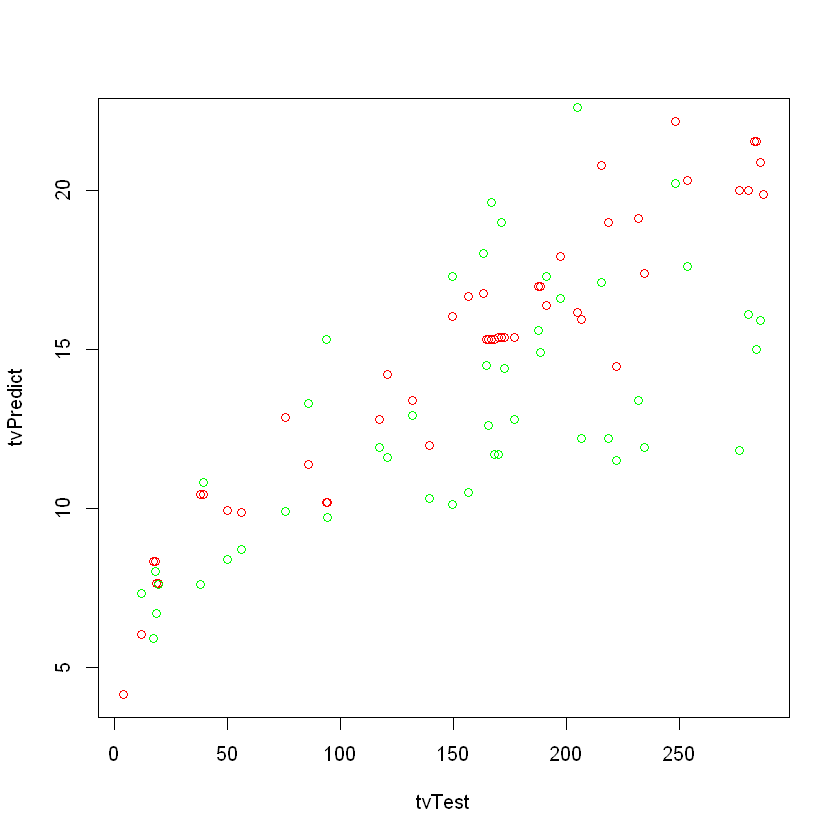

In [67]:
plot(tvTest, tvPredict, type="p", col="red")
lines(tvTest, salesTest, type="p", col="green")

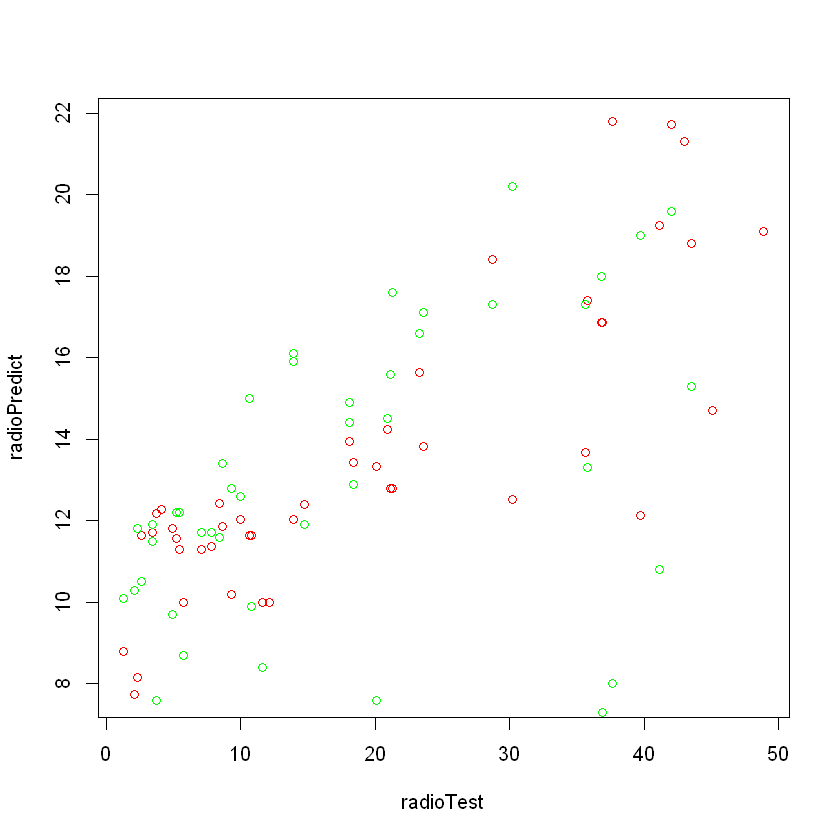

In [68]:
plot(radioTest, radioPredict, type="p", col="red")
lines(radioTest, salesTest, type="p", col="green")

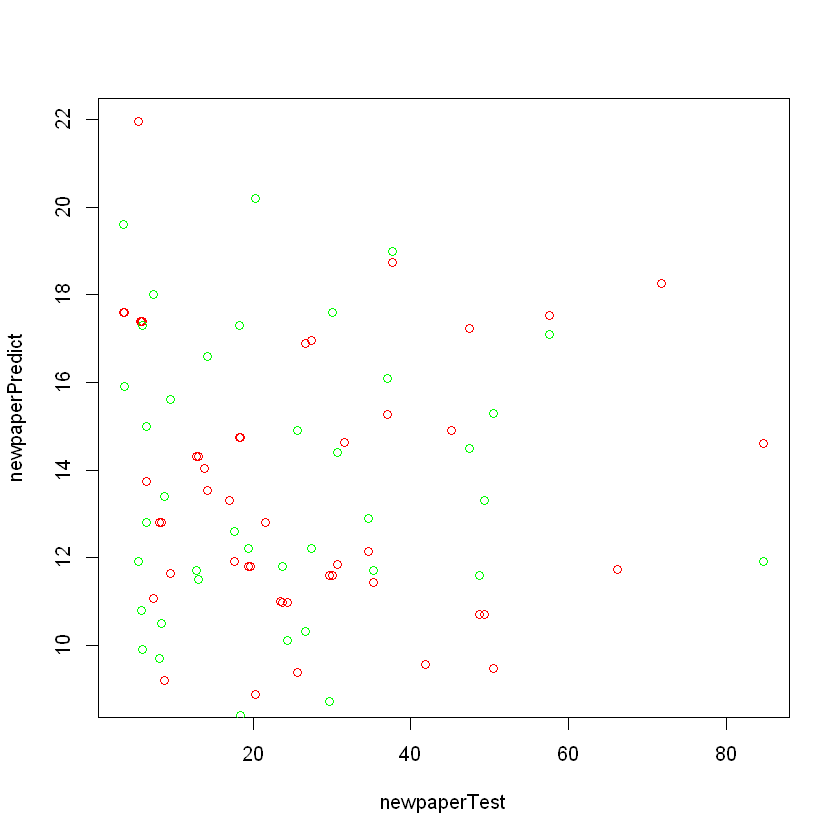

In [69]:
plot(newpaperTest, newpaperPredict, type="p", col="red")
lines(newpaperTest, salesTest, type="p", col="green")

In [70]:
tvMSP <- (sum((salesTest-tvPredict)^2))/length(salesTest)
radioMSP <- (sum((salesTest-radioPredict)^2))/length(salesTest)
newpaperMSP <- (sum((salesTest-newpaperPredict)^2))/length(salesTest)
advMSP <- (sum((salesTest-advPredict)^2))/length(salesTest)

In [71]:
sprintf("Mean Squared Predictors:")
sprintf("TV: %f", tvMSP)
sprintf("Radio: %f", radioMSP)
sprintf("Newspaper: %f", newpaperMSP)
sprintf("3 predictores: %f", advMSP)

[1] "Mean Squared Predictors:"

[1] "TV: 13.631133"

[1] "Radio: 19.118178"

[1] "Newspaper: 36.761578"

[1] "3 predictores: 2.186378"

Como podemos ver, el mejor predictor de los 3 primeros (TV, Radio y Periodico) es TV, pero todos juntos son mejor predictor que TV.